In [1]:
from __future__ import print_function
import numpy as np
import pylab as pl
%pylab inline


Populating the interactive namespace from numpy and matplotlib


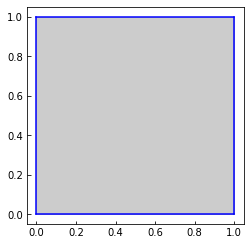

In [2]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")
x0, x1, y0, y1 = 0, 1, 0, 1
pl.plot([x0, x1], [y0, y0], 'b-')
pl.plot([x0, x0], [y0, y1], 'b-')
pl.plot([x0, x1], [y1, y1], 'b-')
pl.plot([x1, x1], [y0, y1], 'b-')

pl.fill_between([x0, x1], [y0, y0], [y1, y1], color='k', alpha=0.2)

In [3]:
print ("square area:", (x1 - x0) * (y1 - y0))

square area: 1


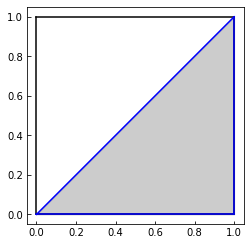

In [4]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")
x0, x1, y0, y1 = 0, 1, 0, 1
pl.plot([x0, x1], [y0, y0], 'k-')
pl.plot([x0, x0], [y0, y1], 'k-')
pl.plot([x0, x1], [y1, y1], 'k-')
pl.plot([x1, x1], [y0, y1], 'k-')

pl.plot([x0, x1], [y0, y0], 'b-')
pl.plot([x1, x1], [y0, y1], 'b-')
pl.plot([x0, x1], [y0, y1], 'b-')

pl.fill_between([x0, x1], [y0, y0], [y0, y1], color='k', alpha=0.2)

In [5]:
print ("triangle area:", (x1 - x0) * (y1 - y0) * 0.5)

triangle area: 0.5


In [6]:
triangle = lambda x : x


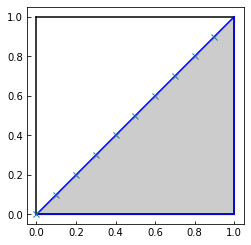

In [8]:
ax = pl.figure().add_subplot(111)
ax.set_aspect("equal")

pl.plot([x0, x1], [y0, y0], 'k-')
pl.plot([x0, x0], [y0, y1], 'k-')
pl.plot([x0, x1], [y1, y1], 'k-')
pl.plot([x1, x1], [y0, y1], 'k-')

pl.plot([x0, x1], [y0, y0], 'b-')
pl.plot([x1, x1], [y0, y1], 'b-')
pl.plot([x0, x1], [y0, y1], 'b-')

pl.fill_between([x0, x1], [y0, y0], [y0, y1], color='k', alpha=0.2)
pl.plot(np.arange(0,1,0.1), triangle(np.arange(0,1,0.1)), 'x')

In [11]:
n = 10
counterIn, counterOut = 0, 0

np.random.seed(123)
for f in range(n):
    x, y = np.random.rand(), np.random.rand()
    if y < x:
        counterIn += 1
    else: 
        counterOut += 1
    
print (counterIn, counterOut, counterIn * 1.0 / n)

6 4 0.6


In [16]:
def getAreaTriangle(n, plot=False):
    counterIn, counterOut = 0, 0
    for f in range(int(n)):
        x, y = np.random.rand(), np.random.rand()
        if y < x:
            counterIn += 1
            if plot:
                plot[0].scatter(x, y, color="black")
                plot[1].canvas.draw()
        else: 
            counterOut += 1
            if plot:
                plot[0].scatter(x, y, color="gray", alpha=0.3)
                plot[1].canvas.draw()
    return counterIn * 1.0 / n



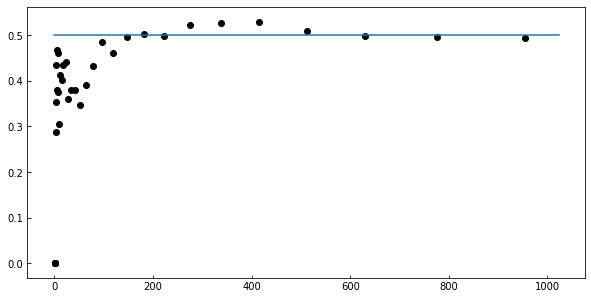

In [17]:
pl.ioff()
ax = pl.figure(figsize = (10,5)).add_subplot(111)
ax.plot([0, 2**10], [0.5, 0.5])

for i in np.arange(0, 10, 0.3):
    np.random.seed(228)
    ratio = getAreaTriangle(2**i)
    #print (2**i, ratio)
    ax.scatter(2**i, ratio, c='k')

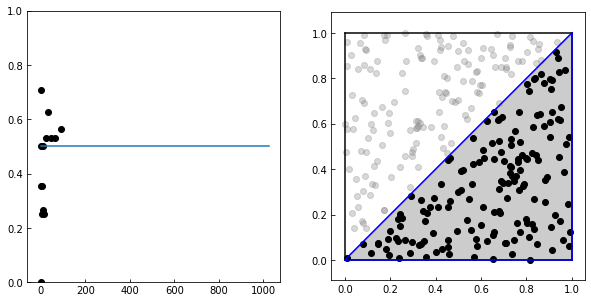

   	ratio	trueRatio	error
90.51 	0.56 	 0.5 		 0.13


KeyboardInterrupt: 

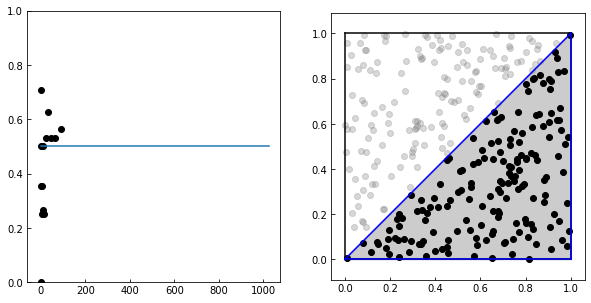

In [19]:
from IPython import display

fig = pl.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.set_aspect("equal")
ax1.plot([0, 2**10], [0.5, 0.5])
ax1.set_ylim(0, 1)
ax2.set_ylim(-0.09, 1.09)
ax2.set_ylim(-0.09, 1.09)
ax2.plot([x0, x1], [y0, y0], 'k-')
ax2.plot([x0, x0], [y0, y1], 'k-')
ax2.plot([x0, x1], [y1, y1], 'k-')
ax2.plot([x1, x1], [y0, y1], 'k-')

ax2.plot([x0, x1], [y0, y0], 'b-')
ax2.plot([x1, x1], [y0, y1], 'b-')
ax2.plot([x0, x1], [y0, y1], 'b-')

ax2.fill_between([x0, x1], [y0, y0], [y0, y1], color='k', alpha=0.2)

np.random.seed(228)
for i in np.arange(0, 10, 0.5):
    ratio = getAreaTriangle(2**i, plot=(ax2,  fig))
    #print (2**i, ratio)
    ax1.scatter(2**i, ratio, c='k')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print ("   \tratio\ttrueRatio\terror")
    print ("%.2f"%2**i, "\t%.2f"%ratio, "\t", 0.5, 
           "\t\t", "%.2f"%np.abs(1.0 - ratio / 0.5))

In [20]:
def getAreaAny(n, func=triangle, plot=False):
    counterIn, counterOut = 0, 0
    for f in range(int(n)):
        x, y = np.random.rand(), np.random.rand()
        if y < func(x):
            counterIn += 1
            if plot:
                plot[0].scatter(x, y, color="black")
                plot[1].canvas.draw()
        else: 
            counterOut += 1
            if plot:
                plot[0].scatter(x, y, color="gray", alpha=0.1)
                plot[1].canvas.draw()
    return counterIn * 1.0 / n

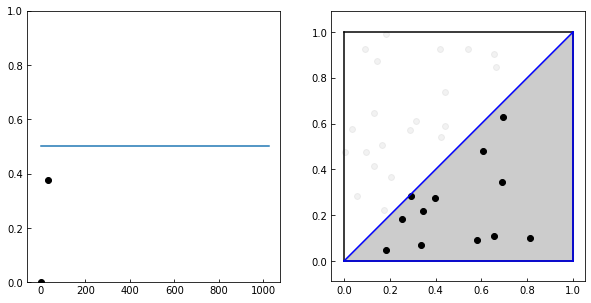

   	ratio	trueRatio	error
32.00 	0.38 	 0.5 		 0.25


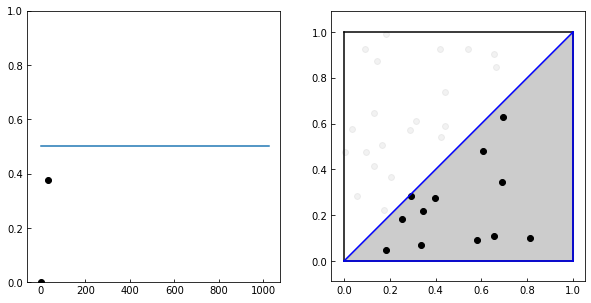

In [21]:
fig = pl.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.set_aspect("equal")
ax1.plot([0, 2**10], [0.5, 0.5])
ax1.set_ylim(0, 1)
ax2.set_ylim(-0.09, 1.09)
ax2.set_ylim(-0.09, 1.09)
ax2.plot([x0, x1], [y0, y0], 'k-')
ax2.plot([x0, x0], [y0, y1], 'k-')
ax2.plot([x0, x1], [y1, y1], 'k-')
ax2.plot([x1, x1], [y0, y1], 'k-')

ax2.plot([x0, x1], [y0, y0], 'b-')
ax2.plot([x1, x1], [y0, y1], 'b-')
ax2.plot([x0, x1], [y0, y1], 'b-')

ax2.fill_between([x0, x1], [y0, y0], [y0, y1], color='k', alpha=0.2)

np.random.seed(228)
for i in np.arange(0, 10, 5):
    ratio = getAreaAny(2**i, plot=(ax2,  fig))
    #print (2**i, ratio)
    ax1.scatter(2**i, ratio, c='k')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print ("   \tratio\ttrueRatio\terror")
    print ("%.2f"%2**i, "\t%.2f"%ratio, "\t", 0.5, 
           "\t\t", "%.2f"%np.abs(1.0 - ratio / 0.5))

In [22]:
def myfunc(x, printint=False):
    p = np.poly1d([-0.3, 0, 0.5, 0.3, -0.4, 0.3])
    if printint:
        return p(x), p.integ
    return p(x)

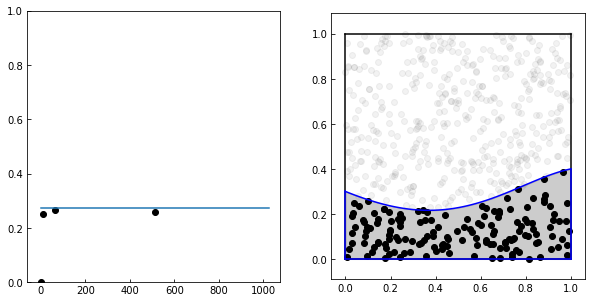

   	ratio	trueRatio	error
512.00 	0.26 	 0.275 		 0.06


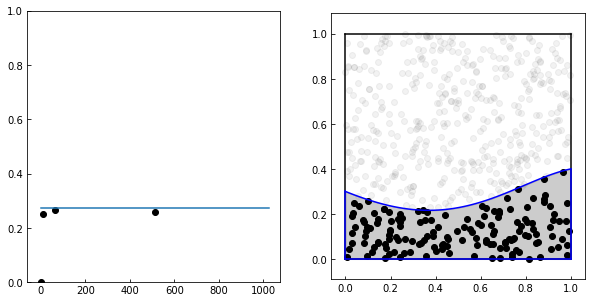

In [23]:
from IPython import display

fig = pl.figure(figsize = (10, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax2.set_aspect("equal")
trueRatio = myfunc(0,  printint=True)[1]()(1) - myfunc(0,  printint=True)[1]()(0)
ax1.plot([0, 2**10], [trueRatio, trueRatio])
ax1.set_ylim(0, 1)

ax2.set_ylim(-0.09, 1.09)
ax2.set_ylim(-0.09, 1.09)
ax2.plot([x0, x1], [y0, y0], 'k-')
ax2.plot([x0, x0], [y0, y1], 'k-')
ax2.plot([x0, x1], [y1, y1], 'k-')
ax2.plot([x1, x1], [y0, y1], 'k-')

ax2.plot(np.linspace(x0, x1, 100), myfunc(np.linspace(x0, x1, 100)), 'b-')
ax2.plot([x0, x1], [y0, y0], 'b-')
ax2.plot([x1, x1], [y0, myfunc(x1)], 'b-')
ax2.plot([x0, x0], [y0, myfunc(x0)], 'b-')

ax2.fill_between(np.linspace(x0, x1, 100), [y0] * 100, 
                 myfunc(np.linspace(x0, x1, 100)), color='k', alpha=0.2)

np.random.seed(228)
for i in np.arange(0, 10, 3):
    ratio = getAreaAny(2**i, func=myfunc, plot=(ax2,  fig))
    ax1.scatter(2**i, ratio, c='k')
    display.clear_output(wait=True)
    display.display(pl.gcf())
    print ("   \tratio\ttrueRatio\terror")
    print ("%.2f"%2**i, "\t%.2f"%ratio, "\t", trueRatio, 
           "\t\t", "%.2f"%np.abs(1.0 - ratio / trueRatio))